## K Means Clustering

## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Read the images

Shape of Image 1 (424, 750, 3)
Shape of Image 2 (225, 225, 3)
Shape of Image 3 (183, 275, 3)


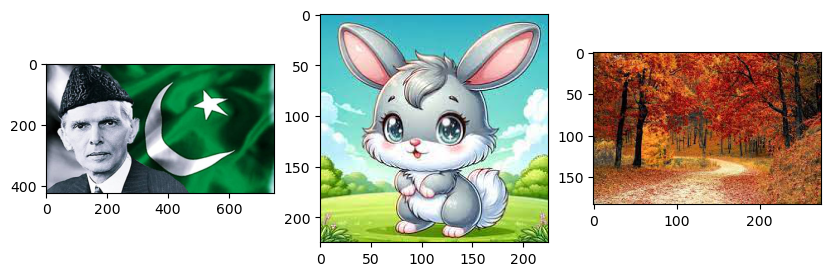

In [2]:
img1 = plt.imread('personality_.jpg')
img2 = plt.imread('rabbit.jpeg')
img3 = plt.imread('autumn.jpeg')

# Getting information about images
print(f'Shape of Image 1 {img1.shape}')
print(f'Shape of Image 2 {img2.shape}')
print(f'Shape of Image 3 {img3.shape}')

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(10,6))
axes[0].imshow(img1)
axes[1].imshow(img2)
axes[2].imshow(img3)
plt.show()


### Converting Data

In [3]:
# Convert images to 2d array
# For image 1
img1_2d = img1.reshape(-1, img1.shape[-1])
print(f"Image 1 : 2D array:{img1_2d.shape}")

# For image 2
img2_2d = img2.reshape(-1, img2.shape[-1])
print(f"Image 2 : 2D array:{img2_2d.shape}")

# For image3
img3_2d = img3.reshape(-1, img3.shape[-1])
print(f"Image 3 : 2D array:{img3_2d.shape}")

Image 1 : 2D array:(318000, 3)
Image 2 : 2D array:(50625, 3)
Image 3 : 2D array:(50325, 3)


###  Selecting Random Centroids

In [5]:
def selecting_centroids(img_2d, k):
    # Randomly select k points from the 2D image array without replacement.
    selected_points = img_2d[np.random.choice(img_2d.shape[0], k, replace=False)]
    return selected_points


### Replacing with nearest point

In [6]:
def map_data_to_closest_neighbour(img_2d ,centroids):
    # Calculate the distance between each pixel in the image and all centroids.
    distance = np.linalg.norm(img_2d[:,np.newaxis]-centroids,axis=2)
    
    # Determine which point is closest to each pixel in the image.
    closest_point_index = np.argmin(distance, axis=1)
    
    return closest_point_index

### Update the centroids

In [7]:
def update(img_2d, close_index, k):
    # Initialize an array to store the updated centroids.
    centroids = np.zeros((k, img_2d.shape[1]))
    
    # Iterate over each centroid.
    for i in range(k):
        
        # Select all points in the image that are assigned to the current centroid.
        points = img_2d[close_index==i]
        
        # Check if there are any points assigned to the current centroid.
        if len(points) > 0:
            
            # Calculate the updated centroid by averaging the positions of all assigned points.
            updated_points = np.sum(points, axis=0) // len(points)
            centroids[i] = updated_points
    
    # Return the updated centroids.
    return centroids

###  Kmeans Clustering

In [8]:
def k_means_clustering(img, k):
    # Step 1: Initialize centroids by randomly selecting k points from the image.
    centroids = selecting_centroids(img, k)
    
    # Step 2: Iteratively assign pixels to the closest centroid and update centroid positions.
    for i in range(100):  # Repeat for a maximum of 100 iterations.
        # Step 2.1: Assign each pixel to the closest centroid.
        labels = map_data_to_closest_neighbour(img, centroids)
        
        # Step 2.2: Update centroid positions based on the assigned pixels.
        updated_centroids = update(img, labels, k)
        
        # Step 2.3: Check if the centroids have converged (no significant change).
        if np.allclose(centroids, updated_centroids):
            break  # If centroids have converged, exit the loop.
        
        # Step 2.4: Update centroids for the next iteration.
        centroids = updated_centroids
    
    # Step 3: Return the final labels (assignments) and centroids.
    return labels, centroids


### Displaying neccesary information about images

### Image 1

k 3
Labels shape:  (318000,)
Centroids shape:  (3, 3)

k 10
Labels shape:  (318000,)
Centroids shape:  (10, 3)

k 20
Labels shape:  (318000,)
Centroids shape:  (20, 3)



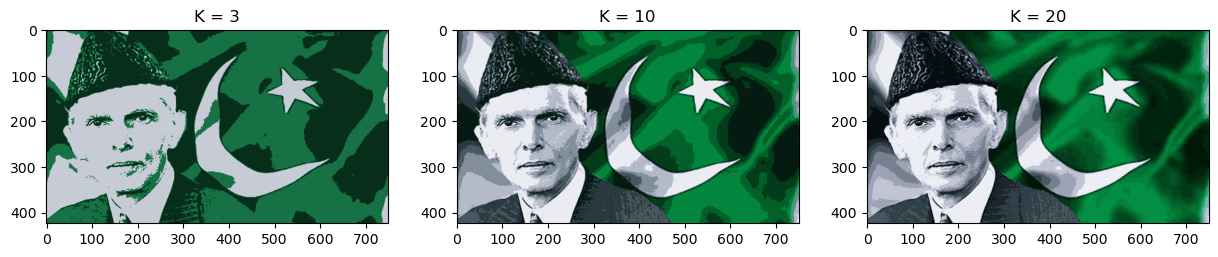

In [13]:
image = img1_2d
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a single row of three subplots

for i, k in enumerate([3, 10, 20]):
    # Run K-means clustering on the image with the current value of k
    labels, centroids = k_means_clustering(image, k)
    
    print('k', k)
    print('Labels shape: ', labels.shape) # Number of clusters
    print('Centroids shape: ', centroids.shape) # Centroids Shape
    print()
    
    # Convert labels to pixel values using centroids
    new_image = centroids[labels].reshape(img1.shape)
    # Convert numpy array to image format
    new_image = Image.fromarray(new_image.astype(np.uint8))
    
    axes[i].imshow(new_image)
    axes[i].set_title(f'K = {k}')  # Add title with value of k

plt.show()

### Image 2

k 3
Labels shape:  (50625,)
Centroids shape:  (3, 3)

k 10
Labels shape:  (50625,)
Centroids shape:  (10, 3)

k 20
Labels shape:  (50625,)
Centroids shape:  (20, 3)



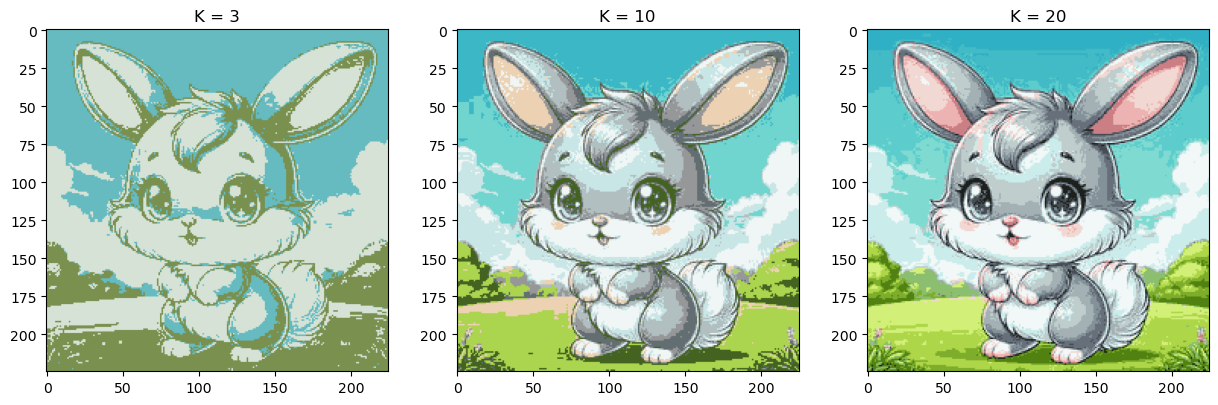

In [10]:
image = img2_2d
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a single row of three subplots

for i, k in enumerate([3, 10, 20]):
    # Run K-means clustering on the image with the current value of k
    labels, centroids = k_means_clustering(image, k)
    
    print('k', k)
    print('Labels shape: ', labels.shape) # Number of clusters
    print('Centroids shape: ', centroids.shape) # Centroids Shape
    print()
    
    # Convert labels to pixel values using centroids
    new_image = centroids[labels].reshape(img2.shape)
    # Convert numpy array to image format
    new_image = Image.fromarray(new_image.astype(np.uint8))
    
    axes[i].imshow(new_image)
    axes[i].set_title(f'K = {k}')  # Add title with value of k

plt.show()


### Image 3

k 3
Labels shape:  (50325,)
Centroids shape:  (3, 3)

k 10
Labels shape:  (50325,)
Centroids shape:  (10, 3)

k 20
Labels shape:  (50325,)
Centroids shape:  (20, 3)



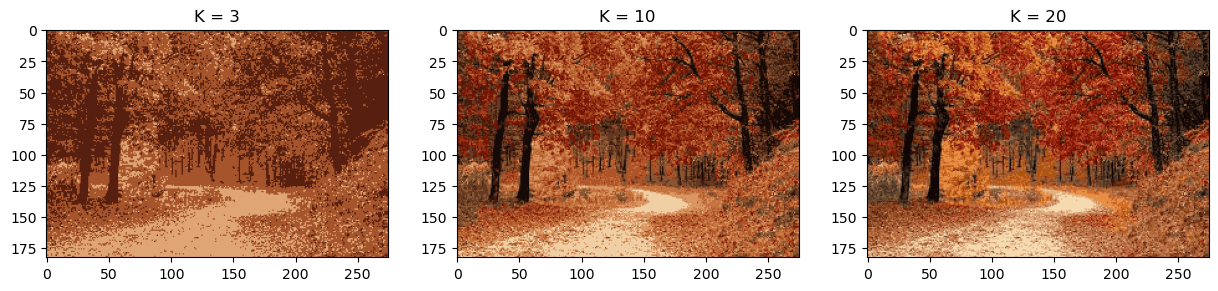

In [12]:
image = img3_2d
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a single row of three subplots

for i, k in enumerate([3, 10, 20]):
    # Run K-means clustering on the image with the current value of k
    labels, centroids = k_means_clustering(image, k)
    
    print('k', k)
    print('Labels shape: ', labels.shape) # Number of clusters
    print('Centroids shape: ', centroids.shape) # Centroids Shape
    print()
    
    # Convert labels to pixel values using centroids
    new_image = centroids[labels].reshape(img3.shape)
    # Convert numpy array to image format
    new_image = Image.fromarray(new_image.astype(np.uint8))

    axes[i].imshow(new_image)
    axes[i].set_title(f'K = {k}')  # Add title with value of k

plt.show()